In [1]:
from langgraph.graph import StateGraph, START, END
from typing import Dict, List, TypedDict
import random

In [3]:
class AgentState(TypedDict):
    name: str
    number: List[int]
    counter: int

In [5]:
def greet_node(state: AgentState)-> AgentState:
    '''Greet the user'''
    state['name']= f"Hii there {state['name']}"
    state['counter']=0
    return state
def random_node(state: AgentState)-> AgentState:
    '''Generates random number from 0 to 10'''
    state['number'].append(random.randint(0,10))
    state['counter']+=1
    return state

In [6]:
def should_continue(state: AgentState) -> AgentState:
    """Function to decide what to do next"""
    if state["counter"] < 5:
        print("ENTERING LOOP", state["counter"])
        return "loop"  # Continue looping
    else:
        return "exit"  # Exit the loop
    

In [7]:
graph= StateGraph(AgentState)
graph.add_node("greet_node", greet_node)
graph.add_node("random_node", random_node)


In [8]:
graph.add_edge("greet_node", "random_node")
graph.add_conditional_edges(
    "random_node",
    should_continue,
    {
        "loop": "random_node",
        "exit": END
    }
)

In [9]:
graph.set_entry_point("greet_node")

app = graph.compile()

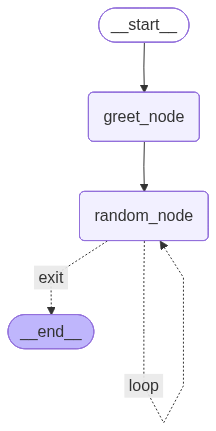

In [10]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [11]:
app.invoke({"name":"Sunny", "number":[], "counter":1})


ENTERING LOOP 1
ENTERING LOOP 2
ENTERING LOOP 3
ENTERING LOOP 4


{'name': 'Hii there Sunny', 'number': [1, 6, 0, 9, 3], 'counter': 5}